In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np

digits = datasets.load_digits()

# digits.image는  (1797, 8, 8), 1797개의 8x8 손글씨 이미지(2차원 배열)
n_samples = len(digits.images)		# n_samples = 1797		

# reshape 함수는 배열의 모양을 바꾸는 함수, 2차원 --> 1차원 배열로 변경
# -1을 사용하면 나머지 차원의 크기는 자동으로 계산
data = digits.images.reshape((n_samples, -1)) 	 # 배열 모양을 1797x64로 reshape	
x = np.array([1, 2, 3, 4])
print(x.shape)  
print(x)

x_reshaped = np.reshape(x, (1, -1))
print(x_reshaped)
print(x_reshaped.shape) 


(4,)
[1 2 3 4]
[[1 2 3 4]]
(1, 4)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)	# KNN 설정
knn.fit(X_train, y_train)	# 학습


KNeighborsClassifier(n_neighbors=8)

In [19]:
# 테스트 데이터로 예측해 본다.
y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)


0.9944444444444445


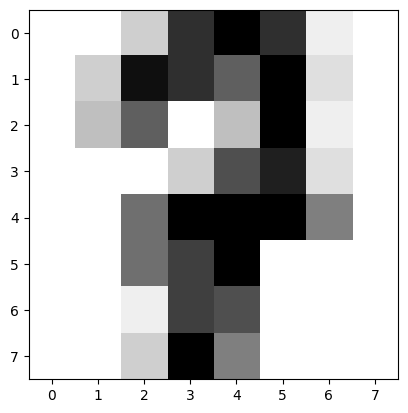

[7]


In [20]:
# 이미지를 출력하기 위하여 평탄화된 이미지를 다시 8×8 형상으로 만든다.
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

y_pred = knn.predict([X_test[10]]) # 입력은 항상 2차원 행렬이어야 한다. 데이터 1개
print(y_pred)

/home/rmaurmau/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rmaurmau/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rmaurmau/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rmaurmau/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rmaurmau/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_

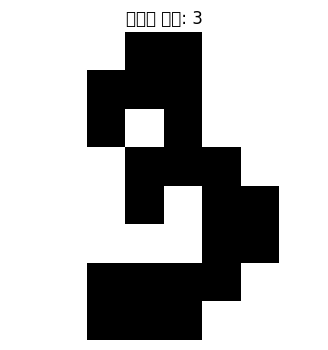

3

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, threshold=128):
    # 이미지 로드
    img = Image.open(image_path)
    
    # 그레이스케일로 변환
    img = img.convert('L')
    
    # 8x8 크기로 리사이즈
    img = img.resize((8, 8), Image.Resampling.LANCZOS)
    
    # numpy 배열로 변환
    img_array = np.array(img)
    
    # 흑백 반전
    img_array = 255 - img_array
    
    # 이진화 (threshold 값보다 크면 255, 작으면 0)
    img_array = np.where(img_array > threshold, 255, 0)
    
    # 0-16 범위로 정규화 (digits 데이터셋과 동일한 범위로)
    img_array = (img_array / 255.0) * 16
    
    # 1차원 배열로 변환
    img_flat = img_array.flatten()
    
    return img_flat

def predict_digit(image_path, threshold=128):
    # 이미지 전처리
    img_processed = preprocess_image(image_path, threshold)
    
    # 예측
    prediction = knn.predict([img_processed])
    
    # 원본 이미지 표시
    plt.figure(figsize=(4, 4))
    plt.imshow(img_processed.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'예측된 숫자: {prediction[0]}')
    plt.axis('off')
    plt.show()
    
    return prediction[0]

predict_digit('image.jpg', threshold=97)  # threshold 값을 조절하여 흑백의 범위를 조정